# Data Analysis
Fused from Analyse_donnees.ipynb

In [20]:
%pip install lightgbm
%pip install researchpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import researchpy as rp

In [22]:
train_data = pd.read_csv("data/train.csv")

In [23]:
train_data.describe()

,age,bmi,children,charges
count,936.000000,936.000000,936.000000,936.000000
mean,39.251068,30.754834,1.083333,13250.135245
std,14.000153,6.262544,1.204048,12422.018284
min,18.000000,16.815000,0.000000,1121.873900
25%,26.750000,26.125000,0.000000,4639.589225
50%,39.000000,30.332500,1.000000,9265.987900
75%,51.000000,34.915000,2.000000,16162.283287
max,64.000000,53.130000,5.000000,63770.428010


## Exploring data

## Check values and na

<AxesSubplot:xlabel='age', ylabel='Count'>

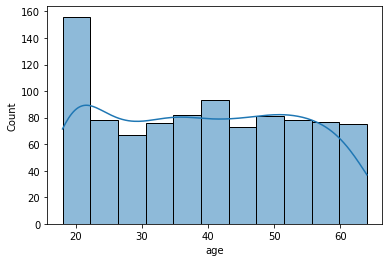

In [24]:
sn.histplot(train_data["age"], kde=True)

It seems we have a lot of young people. We might need to address this surrepresentation somehow.

<AxesSubplot:xlabel='bmi', ylabel='Count'>

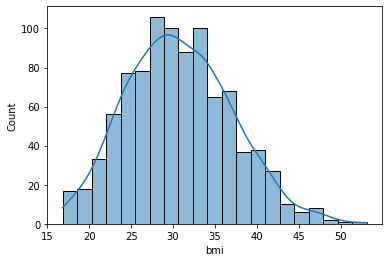

In [25]:
sn.histplot(train_data["bmi"], kde=True)

In [26]:
train_data["bmi"].kurtosis()

-0.14909776028318067

In [27]:
train_data["bmi"].skew()

0.28331662834001514

We have a higher representation of low bmi values. This could be explained by the fact that more values for young people who are more active. However the distribution is still normal since both skewness and kurtosis are close to 0.

<AxesSubplot:xlabel='children', ylabel='Count'>

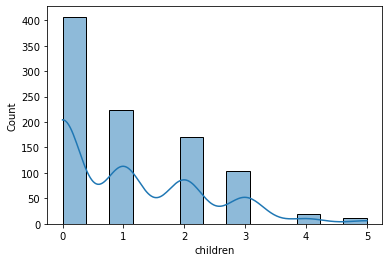

In [28]:
sn.histplot(train_data["children"], kde=True)

We can observe that a lot of the people in our datasets do not have any children. This could be explained by the fact that we have a higher number of young people in our dataset. We might have to counter this.

<AxesSubplot:xlabel='smoker', ylabel='Count'>

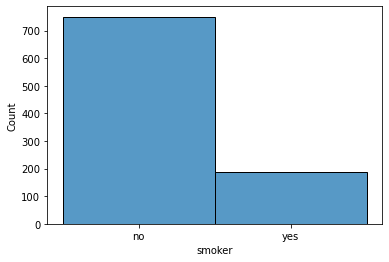

In [29]:
sn.histplot(train_data["smoker"])

A lot of people seem to not smoke in this dataset.

<AxesSubplot:xlabel='sex', ylabel='Count'>

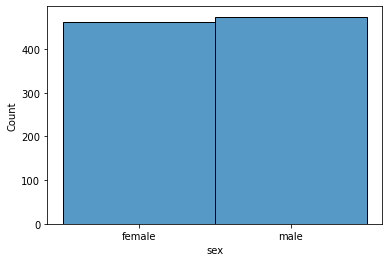

In [30]:
sn.histplot(train_data["sex"])

We seem to have a somewhat equal number of people for both sexes. This will help us a lot for our feature enginering

In [31]:
train_data.isna().value_counts()

age    sex    bmi    children  smoker  region  charges
False  False  False  False     False   False   False      936
dtype: int64

None of the data have any na values. This is good because we don't have to clean the dataset on this part.

<AxesSubplot:xlabel='region', ylabel='Count'>

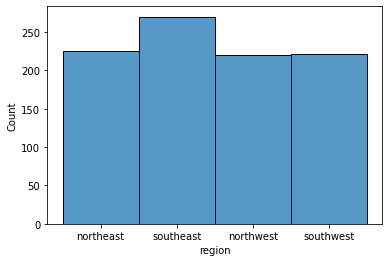

In [32]:
sn.histplot(train_data["region"])

The distribution of people across the regions is quite good, we do have a little bit more people in the southeast.

<AxesSubplot:xlabel='charges', ylabel='Count'>

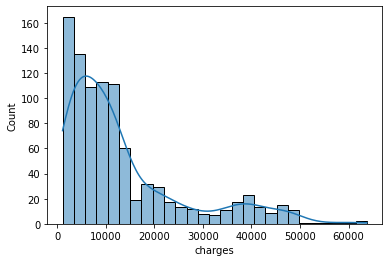

In [33]:
sn.histplot(train_data["charges"], kde=True)

The distribution of charges doesn't follow a normal distribution. We can observe two pics in the distribution, one in low charges and another in high charges. It seems most people pay low charges and the other pay high charges.

## Transform some categorical features

In [34]:
dummies = pd.get_dummies(train_data["sex"])
train_data_tr = pd.concat([train_data, dummies], axis="columns")
train_data_tr = train_data_tr.drop("sex", axis="columns")
train_data_tr

,age,bmi,children,smoker,region,charges,female,male
0,60,27.550,0,no,northeast,13217.09450,1,0
1,46,28.050,1,no,southeast,8233.09750,1,0
2,50,23.540,2,no,southeast,10107.22060,1,0
3,52,27.360,0,yes,northwest,24393.62240,0,1
4,54,32.775,0,no,northeast,10435.06525,0,1
...,...,...,...,...,...,...,...,...
931,57,42.130,1,yes,southeast,48675.51770,0,1
932,57,40.370,0,no,southeast,10982.50130,0,1
933,34,19.000,3,no,northeast,6753.03800,1,0
934,40,25.080,0,no,southeast,5415.66120,0,1


In [35]:
dummies = pd.get_dummies(train_data_tr["smoker"], prefix="smoker")
train_data_tr = pd.concat([train_data_tr, dummies], axis="columns")
train_data_tr = train_data_tr.drop("smoker", axis="columns")
train_data_tr

,age,bmi,children,region,charges,female,male,smoker_no,smoker_yes
0,60,27.550,0,northeast,13217.09450,1,0,1,0
1,46,28.050,1,southeast,8233.09750,1,0,1,0
2,50,23.540,2,southeast,10107.22060,1,0,1,0
3,52,27.360,0,northwest,24393.62240,0,1,0,1
4,54,32.775,0,northeast,10435.06525,0,1,1,0
...,...,...,...,...,...,...,...,...,...
931,57,42.130,1,southeast,48675.51770,0,1,0,1
932,57,40.370,0,southeast,10982.50130,0,1,1,0
933,34,19.000,3,northeast,6753.03800,1,0,1,0
934,40,25.080,0,southeast,5415.66120,0,1,1,0


In [36]:
dummies = pd.get_dummies(train_data_tr["region"])
train_data_tr = pd.concat([train_data_tr, dummies], axis="columns")
train_data_tr = train_data_tr.drop("region", axis="columns")
train_data_tr

,age,bmi,children,charges,female,male,smoker_no,smoker_yes,northeast,northwest,southeast,southwest
0,60,27.550,0,13217.09450,1,0,1,0,1,0,0,0
1,46,28.050,1,8233.09750,1,0,1,0,0,0,1,0
2,50,23.540,2,10107.22060,1,0,1,0,0,0,1,0
3,52,27.360,0,24393.62240,0,1,0,1,0,1,0,0
4,54,32.775,0,10435.06525,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
931,57,42.130,1,48675.51770,0,1,0,1,0,0,1,0
932,57,40.370,0,10982.50130,0,1,1,0,0,0,1,0
933,34,19.000,3,6753.03800,1,0,1,0,1,0,0,0
934,40,25.080,0,5415.66120,0,1,1,0,0,0,1,0


## Interaction between features

<AxesSubplot:>

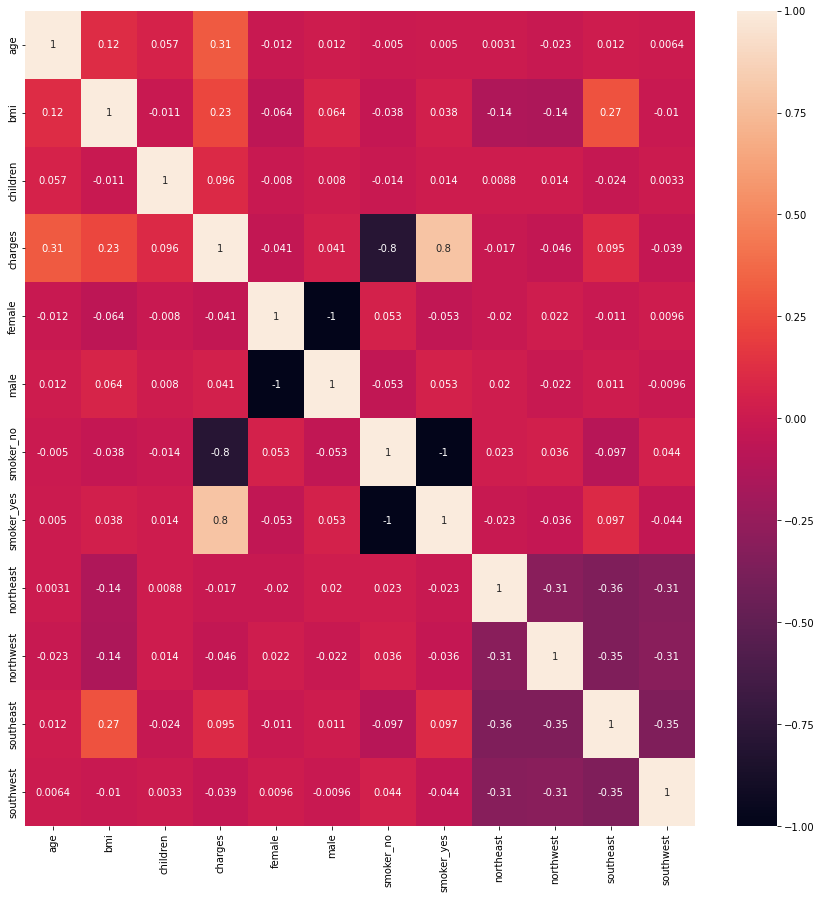

In [37]:
plt.figure(figsize=(15,15))
sn.heatmap(train_data_tr.corr(), annot=True)

From this correlation heatmap, we can see that the charges are mostly correlated to smoking, age and bmi.
Age seem to be somewhat correlated to bmi and this further confirm our suspicion that the older you are, the higher the bmi. We might see a higher correlation if we adjust our data.
BMI seem to be correlated to the southeast region of the US. It is more likely that you have a higher bmi if you live in the southeast region. This seems to reflect real world data from the CDC (https://www.cdc.gov/obesity/data/prevalence-maps.html). In the opposite, if you're in the noth (east or west), you are more likely to have a lower bmi.



<AxesSubplot:xlabel='region', ylabel='charges'>

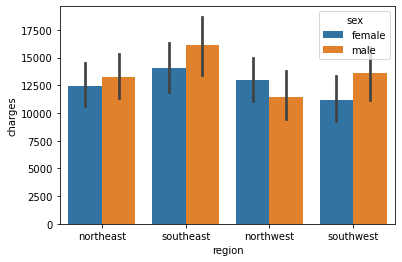

In [38]:
sn.barplot(data=train_data, x="region", y="charges", hue="sex")

In a pattern we can see that male have significantly higher charges in the southeast and southwest. However they have similar charges in the northeast and female have higher charges in the northwest.

<AxesSubplot:xlabel='region', ylabel='charges'>

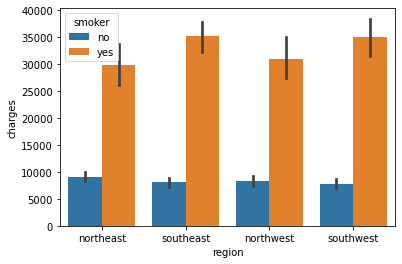

In [39]:
sn.barplot(data=train_data, x="region", y="charges", hue="smoker")

We can see that smoker living in the south seem to have higher charges than other smokers. However non-smoker across the states have the same amount of charges.

<AxesSubplot:xlabel='region', ylabel='charges'>

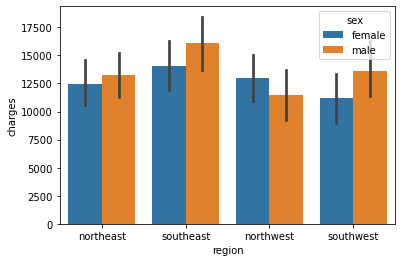

In [40]:
sn.barplot(data=train_data, x="region", y="charges", hue="sex")

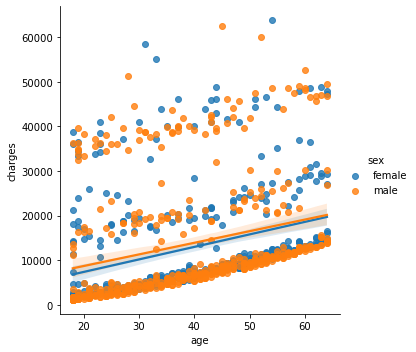

In [41]:
sn.lmplot(data=train_data, x="age", y="charges", hue="sex")

Charges seem to have a somewhat linear relationship with ages. Sex doesn't seem to have an interaction with ages for charges.

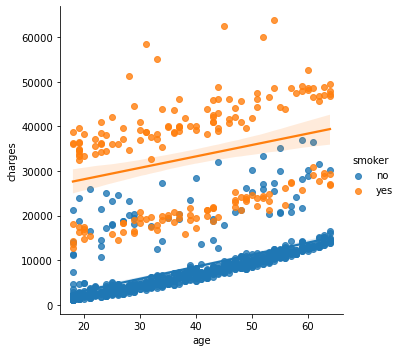

In [42]:
sn.lmplot(data=train_data, x="age", y="charges", hue="smoker")

The fact that someone is not smoking makes the relationship between age and charges even more linear. Not smoking can be a good variable of interaction.

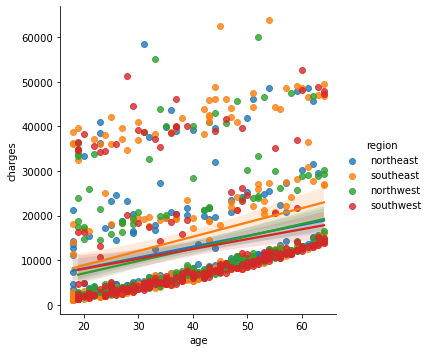

In [43]:
sn.lmplot(data=train_data, x="age", y="charges", hue="region")

<AxesSubplot:xlabel='region', ylabel='age'>

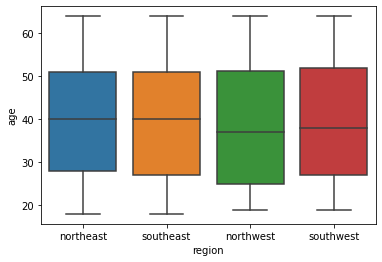

In [44]:
sn.boxplot(x="region", y="age", data=train_data)

In [45]:
crosstab, test_results, expected = rp.crosstab(train_data["region"], train_data["age"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
test_results

,Chi-square test,results
0,Pearson Chi-square ( 138.0) =,141.5310
1,p-value =,0.4010
2,Cramer's V =,0.2245


There is not much impact on the fact that someone is in a certain region on the relationship between age and charges. However, we can see that people in the southeast have a slightly higher slope than other regions. However, if we look at the boxplot of age and region, they seem to be independant and the chi² test confirm that.

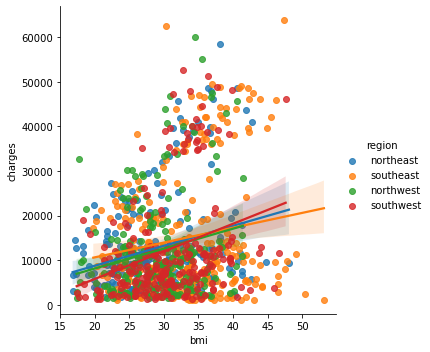

In [46]:
sn.lmplot(data=train_data, x="bmi", y="charges", hue="region")

It seems we have a positive relationship between bmi and charges. However the region doesn't seem to matter much for this relationship. 

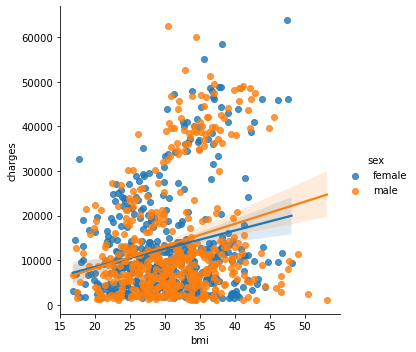

In [47]:
sn.lmplot(data=train_data, x="bmi", y="charges", hue="sex")

The sex doesn't seem to interact with bmi here for charges either.

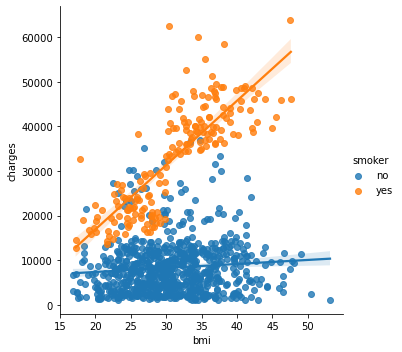

In [48]:
sn.lmplot(data=train_data, x="bmi", y="charges", hue="smoker")

However, it seems like smoking does mean you will have higher charges overall and they will increase more per increase in bmi.

In this next part, we are trying to see if we build a category for southeast people (as south people), would we see some differences

In [49]:
south_people = train_data[train_data["region"].isin(["southeast"])]
north_people = train_data[train_data["region"].isin(["northeast", "southwest", "northwest"])]

In [50]:
train_data.loc[south_people.index, "pole"] = "south"
train_data.loc[north_people.index, "pole"] = "north"

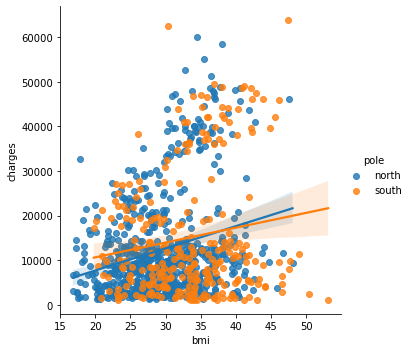

In [51]:
sn.lmplot(data=train_data, x="bmi", y="charges", hue="pole")

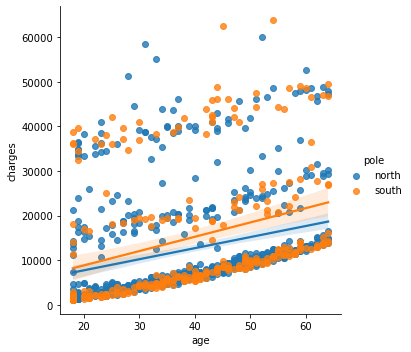

In [52]:
sn.lmplot(data=train_data, x="age", y="charges", hue="pole")

<AxesSubplot:xlabel='pole', ylabel='children'>

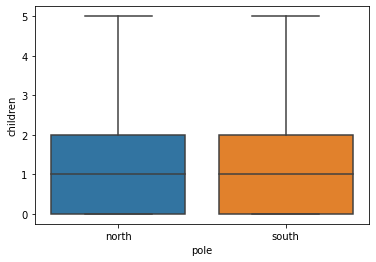

In [53]:
sn.boxplot(data=train_data, x="pole", y="children")

Overall, this category doesn't seem to be interesting, we do not get significant advantages across the relationships for age and bmi. The number of children and this category also seem to be independant. It might still be better to keep the regions as separate variables instead.

<AxesSubplot:xlabel='children', ylabel='age'>

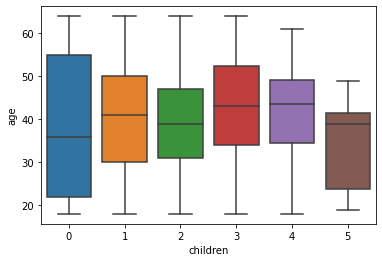

In [54]:
sn.boxplot(data=train_data, x="children", y="age")

In [55]:
crosstab, test_results, expected = rp.crosstab(train_data["children"], train_data["age"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
test_results

,Chi-square test,results
0,Pearson Chi-square ( 230.0) =,394.4193
1,p-value =,0.0000
2,Cramer's V =,0.2903


It does seem like age and children are not independant by looking at this boxplot. The mean and std of each group is quite different. Moreover, the chi² test confirm our suspicion, if we decide to keep children and age, it might be suitable to introduce a new variable of interaction between the two.

## Conclusion
After this investigation, it might be interesting to keep the variables : age, sex, bmi, children, smoker and region. By looking at the distribution of each variable, we can see that they do not follow a normal distribution, even more so when multiple pics seem . It doesn't appear to be a good idea to use a standard scaler here, we might have to use MinMaxScaler to normalize the distributions.

# Model selection
Fused from Model_testing.ipynb

In [56]:
%pip install catboost
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [58]:
train_data = pd.read_csv("data/train.csv", dtype={"sex": "category", "smoker": "category", "region": "category", "age": "int64", "children": "int64", "charges": "float64", "bmi": "float64"})

In [59]:
def create_datasets(data, columns = ["smoker", "age", "bmi", "sex", "region", "children"]):
    return data[columns], data["charges"]

In [60]:
x_train, y_train = create_datasets(train_data)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=.2) 

## Pipeline creation

In [61]:
def create_pipeline(classifier, num_cols = ["age", "bmi", "children"], cat_cols = ["smoker", "sex", "region"], pipe = [], onehot = True, ordinal = True):
    cat_pipe = []
    if ordinal:
        cat_pipe.append(("ordinal", OrdinalEncoder()))
    if onehot:
        cat_pipe.append(("onehot", OneHotEncoder(handle_unknown="ignore")))
    cat_enc = Pipeline(cat_pipe)
    preprocess = Pipeline([
        ("transform", ColumnTransformer([
                ("num", MinMaxScaler(), num_cols),
                ("cat", cat_enc, cat_cols),
            ])
        )
    ])
    pipe = [("preprocess", preprocess)] + pipe + [("classifier", classifier)]
    model = Pipeline(pipe)
    return model

def train_and_score(model):
    model.fit(x_train, y_train)
    return model.score(x_valid, y_valid)

def create_and_train(classifier, **kwargs):
    model = create_pipeline(classifier, **kwargs)
    return train_and_score(model), model


## SGD Regressor

In [62]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
score, model = create_and_train(SGDRegressor(max_iter=100000, tol=1e-3, penalty="elasticnet", l1_ratio=.2, alpha=0.01), pipe = [("polynomial",  PolynomialFeatures(degree = 3))], ordinal=False, onehot=True)
model

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('transform',
                                  ColumnTransformer(transformers=[('num',
                                                                   MinMaxScaler(),
                                                                   ['age',
                                                                    'bmi',
                                                                    'children']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['smoker',
                                                                    'sex',
                                                                    'region'])]))])),

In [63]:
score

0.865439158496838

## Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
score, model = create_and_train(LinearRegression(), pipe = [("polynomial",  PolynomialFeatures(degree = 3))], onehot=False)
model

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('transform',
                                  ColumnTransformer(transformers=[('num',
                                                                   MinMaxScaler(),
                                                                   ['age',
                                                                    'bmi',
                                                                    'children']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('ordinal',
                                                                                    OrdinalEncoder())]),
                                                                   ['smoker',
                                                                    'sex',
                                                                    'region'])]))])),
                ('po

In [65]:
score

0.8712559087814588

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor
score, model = create_and_train(RandomForestRegressor(n_estimators = 1000, criterion = 'squared_error'))
model

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('transform',
                                  ColumnTransformer(transformers=[('num',
                                                                   MinMaxScaler(),
                                                                   ['age',
                                                                    'bmi',
                                                                    'children']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('ordinal',
                                                                                    OrdinalEncoder()),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                        

In [67]:
score

0.8445310295207654

## CatBoost

In [68]:
from catboost import CatBoostRegressor

In [69]:
score, model = create_and_train(CatBoostRegressor(verbose=False), onehot=False)
model

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('transform',
                                  ColumnTransformer(transformers=[('num',
                                                                   MinMaxScaler(),
                                                                   ['age',
                                                                    'bmi',
                                                                    'children']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('ordinal',
                                                                                    OrdinalEncoder())]),
                                                                   ['smoker',
                                                                    'sex',
                                                                    'region'])]))])),
                ('cl

In [70]:
score

0.859818945929851

## LightGBM

In [71]:
from lightgbm import LGBMRegressor


In [72]:
model = create_pipeline(LGBMRegressor(), onehot=True, ordinal=True)
model

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('transform',
                                  ColumnTransformer(transformers=[('num',
                                                                   MinMaxScaler(),
                                                                   ['age',
                                                                    'bmi',
                                                                    'children']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('ordinal',
                                                                                    OrdinalEncoder()),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                        

In [73]:
score

0.859818945929851

## Grid Search
It seems like catboost and lightgbm have the best score as regression models. Since lightgbm is faster to compute, we will continue with this model for the parameter optimisation.

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = {
    'classifier__n_estimators': [40, 50, 60],
    'classifier__max_depth': [3, 4, 5],
    'classifier__num_leaves': [10, 15, 20],
    'classifier__reg_lambda': [1.4, 1.5],
    'classifier__subsample': [.01],
    'classifier__subsample_freq': [0]
}


More parameters have been tested in a wider range. However, for computation purposes, we narrowed down the range of values with each iteration of the grid search. For example, n_estimators initial values for the grid search was : 500, 750, 1000. When we saw that the best parameter was 500, we made another grid search with 300, 400 and 500 (so on and so on for each hyperparameter of the model).

In [76]:
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        Pipeline(steps=[('transform',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          MinMaxScaler(),
                                                                                          ['age',
                                                                                           'bmi',
                                                                                           'children']),
                                                                                         ('cat',
                                                                                          Pipeline(steps=[('ordinal',
                                                                                                           OrdinalEncoder()),
            

In [77]:
grid_search.best_params_

{'classifier__max_depth': 3,
 'classifier__n_estimators': 50,
 'classifier__num_leaves': 10,
 'classifier__reg_lambda': 1.5,
 'classifier__subsample': 0.01,
 'classifier__subsample_freq': 0}

In [78]:
grid_search.best_score_

0.8626708937649546

In [79]:
grid_search.score(x_valid, y_valid)

0.8749563739863697

## Explaining AI

In [87]:
%pip install shap
import shap

Note: you may need to restart the kernel to use updated packages.


In [88]:
class DataTransform:
    def __init__(self, train, scale = True, interact = [("bmi", "smoker_yes"), ("age", "smoker_yes")], drop = ["charges", "sex_female", "smoker_no", "trustii_id"], poly = None):
        self.interact = interact
        self.drop_cols = drop
        self.scaler = None
        self.poly = None
        self.fitted_columns = None
        if scale:
            self.scaler = MinMaxScaler()
        if poly is not None:
            self.poly = PolynomialFeatures(degree=poly)
    
    def fit(self, data):
        df_linear = data.copy()
        df_linear = pd.get_dummies(df_linear)
        if len(self.drop_cols) > 0:
            df_linear = df_linear.drop(columns=self.drop_cols, errors="ignore")
        self.fitted_columns = df_linear.columns.tolist()
        if self.scaler is not None:
            self.scaler.fit(df_linear.values)
        if self.poly is not None:
            self.poly.fit(df_linear.values)
        
    def transform(self, data):
        df_linear = data.copy()
        df_linear = pd.get_dummies(df_linear)
        df_linear = df_linear[self.fitted_columns]
        if len(self.drop_cols) > 0:
            df_linear = df_linear.drop(columns=self.drop_cols, errors="ignore")
        if self.scaler is not None:
            df_linear = pd.DataFrame(self.scaler.transform(df_linear.values), index=df_linear.index, columns=df_linear.columns)
        if self.poly is not None:
            df_linear = pd.DataFrame(self.poly.transform(df_linear.values), index=df_linear.index)
        else:
            self.create_interact(df_linear)
        return df_linear

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)
    
    def create_interact(self, data):
        for (x1, x2) in self.interact:
            data[x1+ "_" + x2] = data[x1] * data[x2]

In [89]:
data_transform = DataTransform(x_train, scale = True, drop = ["charges"])
df_linear = data_transform.fit_transform(x_train)
df_linear

,age,bmi,children,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,bmi_smoker_yes,age_smoker_yes
7,0.369565,0.256368,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000
348,0.673913,0.248520,0.4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.248520,0.673913
713,0.434783,0.557208,0.2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.000000
917,0.847826,0.329616,0.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000
220,0.521739,0.277709,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,0.369565,0.476112,0.6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.476112,0.369565
718,0.413043,0.385103,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000
8,0.086957,0.400248,0.2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.000000
622,0.260870,0.238056,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.000000


In [90]:
lgbm = LGBMRegressor(**{key.replace("classifier__", ""): val for key, val in grid_search.best_params_.items() if key.startswith("classifier__") })
lgbm.fit(data_transform.transform(x_train), y_train)

LGBMRegressor(max_depth=3, n_estimators=50, num_leaves=10, reg_lambda=1.5,
              subsample=0.01)

In [91]:
x_valid_df = data_transform.transform(x_valid)
lgbm.score(x_valid_df, y_valid)

0.8717807350142768

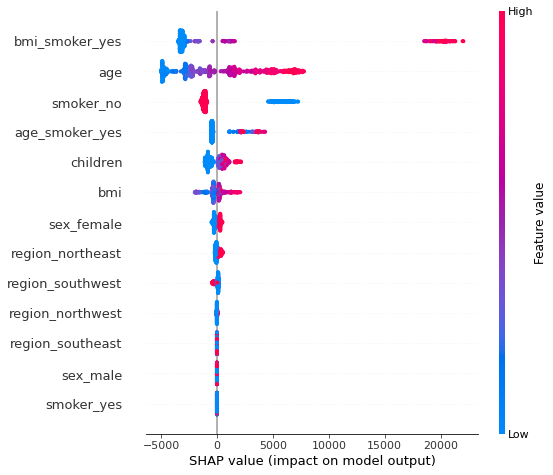

In [92]:
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(df_linear)
shap.summary_plot(shap_values, df_linear)

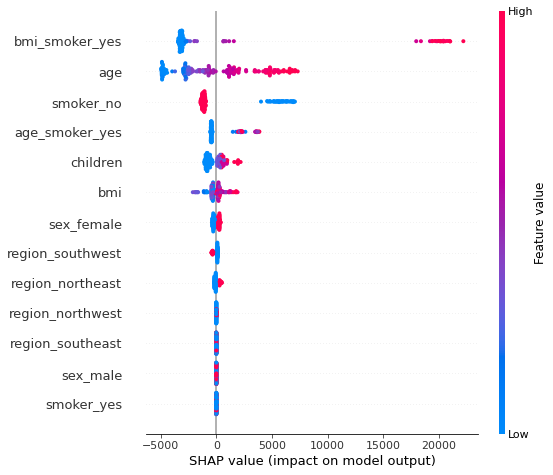

In [93]:
import shap
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(x_valid_df)
shap.summary_plot(shap_values, x_valid_df)

In [94]:
shap.initjs()

In [95]:
shap.force_plot(explainer.expected_value, shap_values[:100, :], df_linear.iloc[:100, :])

In [96]:
shap.force_plot(explainer.expected_value, shap_values[37, :], df_linear.iloc[37, :])

It seems that sex doesn't explain a lot about the charges. However regions southwest and northeast do matter to the result for the charges. Therefore our final model should keep the regions as stated in our analysis but we might drop sex for better results.

# Final Model

In [97]:
import pandas as pd
import numpy as np
# !pip install lightgbm
from lightgbm import LGBMRegressor, Dataset
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

In [98]:
train_data = pd.read_csv("data/train.csv", dtype={"sex": "category", "smoker": "category", "region": "category", "age": "int64", "children": "int64", "charges": "float64", "bmi": "float64"})
data_test = pd.read_csv('data/test.csv', dtype={"sex": "category", "smoker": "category", "region": "category", "age": "int64", "children": "int64", "charges": "float64", "bmi": "float64"})
trustii_id = data_test.trustii_id
X_test = data_test.drop(columns="trustii_id")

In [99]:
X_test

,age,sex,bmi,children,smoker,region
0,51,female,34.960,2,yes,northeast
1,52,male,36.765,2,no,northwest
2,46,female,27.720,1,no,southeast
3,48,male,37.290,2,no,southeast
4,35,female,23.465,2,no,northeast
...,...,...,...,...,...,...
397,27,male,31.130,1,yes,southeast
398,52,female,30.875,0,no,northeast
399,52,male,32.775,3,no,northwest
400,34,female,31.920,1,yes,northeast


In [100]:
def select_columns(data):
    return data[["smoker", "region", "children", "age", "bmi","sex"]]

In [101]:
x_train, y_train = select_columns(train_data), train_data["charges"]
_, x_valid, _, y_valid = train_test_split(x_train, y_train, test_size=.2) 


mapping = {'female':0, 'male':1, 'yes':1,'no':0,'southwest':0, 'southeast':0, 'northwest':1, 'northeast':1}

# combine sexe with smoking
def combine_smoking(df):
    df['sex_smoke'] = 0
    df.loc[(df.sex =='female') & (df.smoker=="no"), "sex_smoke"] = "F no"
    df.loc[(df.sex =='male') & (df.smoker=="no"), "sex_smoke"] = "M no"
    df.loc[(df.sex =='female') & (df.smoker=="yes"), "sex_smoke"] = "F yes"
    df.loc[(df.sex =='male') & (df.smoker=="yes"), "sex_smoke"] = "M yes"

    df.drop(columns=['sex','smoker'],inplace=True)
    # df.sex_smoke.iloc[(df.sex =='female') ] = 0
    # df.sex_smoke.iloc[(df.sex =='male') ] = 1
    # df.sex_smoke.iloc[(df.sex =='female') ] = 2
    # df.sex_smoke.iloc[(df.sex =='male') ] = 3    


    return df

x_train = x_train.replace({'sex': mapping, 'smoker': mapping, 'region':mapping})
x_valid = x_valid.replace({'sex': mapping, 'smoker': mapping, 'region':mapping})
X_test = X_test.replace({'sex': mapping, 'smoker': mapping, 'region':mapping})


def transform_data(df):
    # split age to caterogy
    df['age'] = pd.cut(df.age, bins=[0, 18, 25, 35, 45, 55, 65, 75, 85, 95, 105], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    # split bmi to caterogy
    df['bmi'] = pd.cut(df.bmi, bins=[0, 20, 25, 30, 35, 40, 45, 50, 55, 60], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
    return df

# x_train = transform_data(x_train)
# x_valid = transform_data(x_valid)
# X_test = transform_data(X_test)

In [102]:
x_train.drop(columns="sex",inplace=True)
x_valid.drop(columns="sex",inplace=True)
X_test.drop(columns="sex",inplace=True)

# x_train.drop(columns="children",inplace=True)
# x_valid.drop(columns="children",inplace=True)
# X_test.drop(columns="children",inplace=True)

scaler = MinMaxScaler

In [103]:
def preprocess_data():
    preprocess = Pipeline([
        ("transform", ColumnTransformer([
                # ("num", scaler(), [ "age", "bmi"]),                
                # ("cat", OneHotEncoder(), [  "smoker", "region", "children"]),                           
                ("num", scaler(), [ "age", "bmi"]),                
                ("cat", OneHotEncoder(), ["smoker","region", "children"]),                                           
            ])
        )
    ])

    return preprocess



In [104]:
x_train.head()

,smoker,region,children,age,bmi
0,0,1,0,60,27.550
1,0,0,1,46,28.050
2,0,0,2,50,23.540
3,1,1,0,52,27.360
4,0,1,0,54,32.775


In [105]:
preprocessor = preprocess_data()

x_train_eval = preprocessor.fit_transform(x_train)
x_valid_eval = preprocessor.transform(x_valid)
X_test_eval = preprocessor.transform(X_test)
preprocessor.get_feature_names_out()

array(['num__age', 'num__bmi', 'cat__smoker_0', 'cat__smoker_1',
       'cat__region_0', 'cat__region_1', 'cat__children_0',
       'cat__children_1', 'cat__children_2', 'cat__children_3',
       'cat__children_4', 'cat__children_5'], dtype=object)

In [106]:
model = LGBMRegressor()
model

LGBMRegressor()

In [107]:
param_grid = {
    # 'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
    'n_estimators': [10, 50],
    'max_depth': [3 , 9],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 63],
    # 'min_child_samples': [20, 40, 60, 80, 100],
    'subsample': [0.01],
    # 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0.0,  1.0,  1.5],
    'reg_lambda': [0.0,  1.0, 1.5],
    # 'min_split_gain': [0.0, 0.25, 0.5, 0.75, 1.0],
    # 'subsample_freq': [0, 1, 2, 3, 4],
    # 'min_child_weight': [0.001, 0.01, 0.1, 1.0, 10.0],
    # 'subsample_for_bin': [20000, 40000, 60000, 80000, 100000],
    # 'min_data_per_group': [100, 200, 300, 400, 500],
    # 'max_cat_to_onehot': [4, 8, 16, 32, 64],
    # 'cat_l2': [0.0, 0.25, 0.5, 0.75, 1.0],
    # 'cat_smooth': [0.0, 0.25, 0.5, 0.75, 1.0],
    # 'max_cat_threshold': [32, 64, 128, 256, 512],
    'metric': ['l2'],
    # 'n_jobs': [-1],
    # 'random_state': [42],
    # 'early_stopping_rounds': [20],
    # 'verbose': [0]
    
}

param_ ={'max_depth': 3,
 'n_estimators': 50,
 'num_leaves': 10,
 'reg_lambda': 1.4,
 'subsample': 0.01,
 'learning_rate': 0.1,
 'subsample_freq': 0}

model = LGBMRegressor(**param_)
model.fit(x_train_eval, y_train)


LGBMRegressor(max_depth=3, n_estimators=50, num_leaves=10, reg_lambda=1.4,
              subsample=0.01)

In [108]:
np.round(model.score(x_valid_eval, y_valid)*100,2)

86.59

In [109]:
gs = GridSearchCV(model, param_grid, cv=3)
gs.fit(x_train_eval, y_train, eval_set=[(x_valid_eval, y_valid)], early_stopping_rounds=10)

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[1]	valid_0's l2: 1.38109e+08
[2]	valid_0's l2: 1.35837e+08
[3]	valid_0's l2: 1.33611e+08
[4]	valid_0's l2: 1.31429e+08
[5]	valid_0's l2: 1.29291e+08
[6]	valid_0's l2: 1.27195e+08
[7]	valid_0's l2: 1.25141e+08
[8]	valid_0's l2: 1.23128e+08
[9]	valid_0's l2: 1.21155e+08
[10]	valid_0's l2: 1.19191e+08
[1]	valid_0's l2: 1.38958e+08
[2]	valid_0's l2: 1.36671e+08
[3]	valid_0's l2: 1.34429e+08
[4]	valid_0's l2: 1.32232e+08
[5]	valid_0's l2: 1.30079e+08
[6]	valid_0's l2: 1.27968e+08
[7]	valid_0's l2: 1.259e+08
[8]	valid_0's l2: 1.23873e+08
[9]	valid_0's l2: 1.2188e+08
[10]	valid_0's l2: 1.19932e+08
[1]	valid_0's l2: 1.40992e+08
[2]	valid_0's l2: 1.3858e+08
[3]	valid_0's l2: 1.36217e+08
[4]	valid_0's l2: 1.33902e+08
[5]	valid_0's l2: 1.31634e+08
[6]	valid_0's l2: 1.29411e+08
[7]	valid_0's l2: 1.27225e+08
[8]	valid_0's l2: 1.25091e+08
[9]	valid_0's l2: 1.22992e+08
[10]	valid_0's l2: 1.20986e+08
[1]	valid_0's l2: 1.38097e+08
[2]	valid_0's l2: 1.35814e+08
[3]	valid_0's l2: 1.33641e+08
[4]	valid_0

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[1]	valid_0's l2: 1.38114e+08
[2]	valid_0's l2: 1.35846e+08
[3]	valid_0's l2: 1.33583e+08
[4]	valid_0's l2: 1.31404e+08
[5]	valid_0's l2: 1.29268e+08
[6]	valid_0's l2: 1.27135e+08
[7]	valid_0's l2: 1.25083e+08
[8]	valid_0's l2: 1.23033e+08
[9]	valid_0's l2: 1.21061e+08
[10]	valid_0's l2: 1.19128e+08
[1]	valid_0's l2: 1.38938e+08
[2]	valid_0's l2: 1.36631e+08
[3]	valid_0's l2: 1.3437e+08
[4]	valid_0's l2: 1.32153e+08
[5]	valid_0's l2: 1.29979e+08
[6]	valid_0's l2: 1.27849e+08
[7]	valid_0's l2: 1.25761e+08
[8]	valid_0's l2: 1.23723e+08
[9]	valid_0's l2: 1.21698e+08
[10]	valid_0's l2: 1.19729e+08
[1]	valid_0's l2: 1.41053e+08
[2]	valid_0's l2: 1.38705e+08
[3]	valid_0's l2: 1.36398e+08
[4]	valid_0's l2: 1.34141e+08
[5]	valid_0's l2: 1.31923e+08
[6]	valid_0's l2: 1.29754e+08
[7]	valid_0's l2: 1.27623e+08
[8]	valid_0's l2: 1.25538e+08
[9]	valid_0's l2: 1.23489e+08
[10]	valid_0's l2: 1.21485e+08
[1]	valid_0's l2: 1.38109e+08
[2]	valid_0's l2: 1.35837e+08
[3]	valid_0's l2: 1.33611e+08
[4]	vali

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[1]	valid_0's l2: 1.38097e+08
[2]	valid_0's l2: 1.35814e+08
[3]	valid_0's l2: 1.33641e+08
[4]	valid_0's l2: 1.3151e+08
[5]	valid_0's l2: 1.29318e+08
[6]	valid_0's l2: 1.2727e+08
[7]	valid_0's l2: 1.25263e+08
[8]	valid_0's l2: 1.23196e+08
[9]	valid_0's l2: 1.21267e+08
[10]	valid_0's l2: 1.19375e+08
[11]	valid_0's l2: 1.17427e+08
[12]	valid_0's l2: 1.1561e+08
[13]	valid_0's l2: 1.13737e+08
[14]	valid_0's l2: 1.11991e+08
[15]	valid_0's l2: 1.10278e+08
[16]	valid_0's l2: 1.08584e+08
[17]	valid_0's l2: 1.06937e+08
[18]	valid_0's l2: 1.05323e+08
[19]	valid_0's l2: 1.03725e+08
[20]	valid_0's l2: 1.02177e+08
[21]	valid_0's l2: 1.00655e+08
[22]	valid_0's l2: 9.91527e+07
[23]	valid_0's l2: 9.76893e+07
[24]	valid_0's l2: 9.62587e+07
[25]	valid_0's l2: 9.48334e+07
[26]	valid_0's l2: 9.3458e+07
[27]	valid_0's l2: 9.21051e+07
[28]	valid_0's l2: 9.0765e+07
[29]	valid_0's l2: 8.94642e+07
[30]	valid_0's l2: 8.81928e+07
[31]	valid_0's l2: 8.69249e+07
[32]	valid_0's l2: 8.56955e+07
[33]	valid_0's l2: 8.4

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[1]	valid_0's l2: 1.38097e+08
[2]	valid_0's l2: 1.35814e+08
[3]	valid_0's l2: 1.33641e+08
[4]	valid_0's l2: 1.3151e+08
[5]	valid_0's l2: 1.29318e+08
[6]	valid_0's l2: 1.2727e+08
[7]	valid_0's l2: 1.25263e+08
[8]	valid_0's l2: 1.23196e+08
[9]	valid_0's l2: 1.21267e+08
[10]	valid_0's l2: 1.19375e+08
[11]	valid_0's l2: 1.17427e+08
[12]	valid_0's l2: 1.1561e+08
[13]	valid_0's l2: 1.13737e+08
[14]	valid_0's l2: 1.11991e+08
[15]	valid_0's l2: 1.10278e+08
[16]	valid_0's l2: 1.08584e+08
[17]	valid_0's l2: 1.06937e+08
[18]	valid_0's l2: 1.05323e+08
[19]	valid_0's l2: 1.03725e+08
[20]	valid_0's l2: 1.02177e+08
[21]	valid_0's l2: 1.00655e+08
[22]	valid_0's l2: 9.91527e+07
[23]	valid_0's l2: 9.76893e+07
[24]	valid_0's l2: 9.62587e+07
[25]	valid_0's l2: 9.48334e+07
[26]	valid_0's l2: 9.3458e+07
[27]	valid_0's l2: 9.21051e+07
[28]	valid_0's l2: 9.0765e+07
[29]	valid_0's l2: 8.94642e+07
[30]	valid_0's l2: 8.81928e+07
[31]	valid_0's l2: 8.69249e+07
[32]	valid_0's l2: 8.56955e+07
[33]	valid_0's l2: 8.4

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[9]	valid_0's l2: 1.23489e+08
[10]	valid_0's l2: 1.21485e+08
[11]	valid_0's l2: 1.19516e+08
[12]	valid_0's l2: 1.1759e+08
[13]	valid_0's l2: 1.15695e+08
[14]	valid_0's l2: 1.13839e+08
[15]	valid_0's l2: 1.12018e+08
[16]	valid_0's l2: 1.10239e+08
[17]	valid_0's l2: 1.08489e+08
[18]	valid_0's l2: 1.06774e+08
[19]	valid_0's l2: 1.05092e+08
[20]	valid_0's l2: 1.03444e+08
[21]	valid_0's l2: 1.01828e+08
[22]	valid_0's l2: 1.00244e+08
[23]	valid_0's l2: 9.86915e+07
[24]	valid_0's l2: 9.7169e+07
[25]	valid_0's l2: 9.56808e+07
[26]	valid_0's l2: 9.42177e+07
[27]	valid_0's l2: 9.27837e+07
[28]	valid_0's l2: 9.13764e+07
[29]	valid_0's l2: 8.99983e+07
[30]	valid_0's l2: 8.86447e+07
[31]	valid_0's l2: 8.73188e+07
[32]	valid_0's l2: 8.60132e+07
[33]	valid_0's l2: 8.47426e+07
[34]	valid_0's l2: 8.3495e+07
[35]	valid_0's l2: 8.22653e+07
[36]	valid_0's l2: 8.10681e+07
[37]	valid_0's l2: 7.98894e+07
[38]	valid_0's l2: 7.87269e+07
[39]	valid_0's l2: 7.75989e+07
[40]	valid_0's l2: 7.64926e+07
[41]	valid_0

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[2]	valid_0's l2: 1.38612e+08
[3]	valid_0's l2: 1.36264e+08
[4]	valid_0's l2: 1.33961e+08
[5]	valid_0's l2: 1.31704e+08
[6]	valid_0's l2: 1.29492e+08
[7]	valid_0's l2: 1.27324e+08
[8]	valid_0's l2: 1.25198e+08
[9]	valid_0's l2: 1.23115e+08
[10]	valid_0's l2: 1.21072e+08
[1]	valid_0's l2: 1.38108e+08
[2]	valid_0's l2: 1.35836e+08
[3]	valid_0's l2: 1.33566e+08
[4]	valid_0's l2: 1.31382e+08
[5]	valid_0's l2: 1.29241e+08
[6]	valid_0's l2: 1.27103e+08
[7]	valid_0's l2: 1.25046e+08
[8]	valid_0's l2: 1.22991e+08
[9]	valid_0's l2: 1.21014e+08
[10]	valid_0's l2: 1.19076e+08
[1]	valid_0's l2: 1.38922e+08
[2]	valid_0's l2: 1.36599e+08
[3]	valid_0's l2: 1.34322e+08
[4]	valid_0's l2: 1.32088e+08
[5]	valid_0's l2: 1.29897e+08
[6]	valid_0's l2: 1.27751e+08
[7]	valid_0's l2: 1.25648e+08
[8]	valid_0's l2: 1.23594e+08
[9]	valid_0's l2: 1.21572e+08
[10]	valid_0's l2: 1.1959e+08
[1]	valid_0's l2: 1.41033e+08
[2]	valid_0's l2: 1.3866e+08
[3]	valid_0's l2: 1.36333e+08
[4]	valid_0's l2: 1.34053e+08
[5]	valid

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[19]	valid_0's l2: 1.04023e+08
[20]	valid_0's l2: 1.02343e+08
[21]	valid_0's l2: 1.00696e+08
[22]	valid_0's l2: 9.90836e+07
[23]	valid_0's l2: 9.75018e+07
[24]	valid_0's l2: 9.59533e+07
[25]	valid_0's l2: 9.44325e+07
[26]	valid_0's l2: 9.29416e+07
[27]	valid_0's l2: 9.14821e+07
[28]	valid_0's l2: 9.00504e+07
[29]	valid_0's l2: 8.86538e+07
[30]	valid_0's l2: 8.7279e+07
[31]	valid_0's l2: 8.59336e+07
[32]	valid_0's l2: 8.4615e+07
[33]	valid_0's l2: 8.33305e+07
[34]	valid_0's l2: 8.20773e+07
[35]	valid_0's l2: 8.08425e+07
[36]	valid_0's l2: 7.9636e+07
[37]	valid_0's l2: 7.84499e+07
[38]	valid_0's l2: 7.72951e+07
[39]	valid_0's l2: 7.617e+07
[40]	valid_0's l2: 7.50585e+07
[41]	valid_0's l2: 7.39647e+07
[42]	valid_0's l2: 7.28951e+07
[43]	valid_0's l2: 7.18591e+07
[44]	valid_0's l2: 7.08322e+07
[45]	valid_0's l2: 6.98242e+07
[46]	valid_0's l2: 6.88489e+07
[47]	valid_0's l2: 6.78795e+07
[48]	valid_0's l2: 6.69319e+07
[49]	valid_0's l2: 6.60014e+07
[50]	valid_0's l2: 6.51035e+07
[1]	valid_0's

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[29]	valid_0's l2: 8.82073e+07
[30]	valid_0's l2: 8.68718e+07
[31]	valid_0's l2: 8.55983e+07
[32]	valid_0's l2: 8.43151e+07
[33]	valid_0's l2: 8.30617e+07
[34]	valid_0's l2: 8.18338e+07
[35]	valid_0's l2: 8.0622e+07
[36]	valid_0's l2: 7.94424e+07
[37]	valid_0's l2: 7.83155e+07
[38]	valid_0's l2: 7.71829e+07
[39]	valid_0's l2: 7.60987e+07
[40]	valid_0's l2: 7.50056e+07
[41]	valid_0's l2: 7.39631e+07
[42]	valid_0's l2: 7.29406e+07
[43]	valid_0's l2: 7.19147e+07
[44]	valid_0's l2: 7.09315e+07
[45]	valid_0's l2: 6.9946e+07
[46]	valid_0's l2: 6.89946e+07
[47]	valid_0's l2: 6.80628e+07
[48]	valid_0's l2: 6.71315e+07
[49]	valid_0's l2: 6.62145e+07
[50]	valid_0's l2: 6.53361e+07
[1]	valid_0's l2: 1.40977e+08
[2]	valid_0's l2: 1.38551e+08
[3]	valid_0's l2: 1.36174e+08
[4]	valid_0's l2: 1.33844e+08
[5]	valid_0's l2: 1.31561e+08
[6]	valid_0's l2: 1.29323e+08
[7]	valid_0's l2: 1.27131e+08
[8]	valid_0's l2: 1.24982e+08
[9]	valid_0's l2: 1.22879e+08
[10]	valid_0's l2: 1.20816e+08
[11]	valid_0's l2: 

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[46]	valid_0's l2: 6.89946e+07
[47]	valid_0's l2: 6.80629e+07
[48]	valid_0's l2: 6.71316e+07
[49]	valid_0's l2: 6.62152e+07
[50]	valid_0's l2: 6.53444e+07
[1]	valid_0's l2: 1.40977e+08
[2]	valid_0's l2: 1.38551e+08
[3]	valid_0's l2: 1.36174e+08
[4]	valid_0's l2: 1.33844e+08
[5]	valid_0's l2: 1.31561e+08
[6]	valid_0's l2: 1.29323e+08
[7]	valid_0's l2: 1.27131e+08
[8]	valid_0's l2: 1.24982e+08
[9]	valid_0's l2: 1.22879e+08
[10]	valid_0's l2: 1.20816e+08
[11]	valid_0's l2: 1.18795e+08
[12]	valid_0's l2: 1.16814e+08
[13]	valid_0's l2: 1.14875e+08
[14]	valid_0's l2: 1.12972e+08
[15]	valid_0's l2: 1.11109e+08
[16]	valid_0's l2: 1.09283e+08
[17]	valid_0's l2: 1.07493e+08
[18]	valid_0's l2: 1.05739e+08
[19]	valid_0's l2: 1.04023e+08
[20]	valid_0's l2: 1.02339e+08
[21]	valid_0's l2: 1.00691e+08
[22]	valid_0's l2: 9.9074e+07
[23]	valid_0's l2: 9.74923e+07
[24]	valid_0's l2: 9.59378e+07
[25]	valid_0's l2: 9.44231e+07
[26]	valid_0's l2: 9.29321e+07
[27]	valid_0's l2: 9.14775e+07
[28]	valid_0's l2:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[1]	valid_0's l2: 1.38894e+08
[2]	valid_0's l2: 1.36545e+08
[3]	valid_0's l2: 1.34241e+08
[4]	valid_0's l2: 1.31981e+08
[5]	valid_0's l2: 1.29768e+08
[6]	valid_0's l2: 1.27703e+08
[7]	valid_0's l2: 1.25576e+08
[8]	valid_0's l2: 1.23593e+08
[9]	valid_0's l2: 1.21648e+08
[10]	valid_0's l2: 1.1965e+08
[11]	valid_0's l2: 1.17766e+08
[12]	valid_0's l2: 1.15915e+08
[13]	valid_0's l2: 1.14023e+08
[14]	valid_0's l2: 1.12179e+08
[15]	valid_0's l2: 1.10435e+08
[16]	valid_0's l2: 1.08727e+08
[17]	valid_0's l2: 1.06986e+08
[18]	valid_0's l2: 1.05343e+08
[19]	valid_0's l2: 1.03751e+08
[20]	valid_0's l2: 1.02109e+08
[21]	valid_0's l2: 1.00567e+08
[22]	valid_0's l2: 9.90478e+07
[23]	valid_0's l2: 9.75057e+07
[24]	valid_0's l2: 9.60454e+07
[25]	valid_0's l2: 9.46265e+07
[26]	valid_0's l2: 9.31736e+07
[27]	valid_0's l2: 9.17964e+07
[28]	valid_0's l2: 9.0451e+07
[29]	valid_0's l2: 8.90744e+07
[30]	valid_0's l2: 8.7781e+07
[31]	valid_0's l2: 8.65074e+07
[32]	valid_0's l2: 8.52107e+07
[33]	valid_0's l2: 8

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[20]	valid_0's l2: 1.01538e+08
[21]	valid_0's l2: 9.99466e+07
[22]	valid_0's l2: 9.84215e+07
[23]	valid_0's l2: 9.69198e+07
[24]	valid_0's l2: 9.54204e+07
[25]	valid_0's l2: 9.40332e+07
[26]	valid_0's l2: 9.26832e+07
[27]	valid_0's l2: 9.12656e+07
[28]	valid_0's l2: 8.99539e+07
[29]	valid_0's l2: 8.86769e+07
[30]	valid_0's l2: 8.74065e+07
[31]	valid_0's l2: 8.61723e+07
[32]	valid_0's l2: 8.49581e+07
[33]	valid_0's l2: 8.37619e+07
[34]	valid_0's l2: 8.26002e+07
[35]	valid_0's l2: 8.1444e+07
[36]	valid_0's l2: 8.02863e+07
[37]	valid_0's l2: 7.9174e+07
[38]	valid_0's l2: 7.80738e+07
[39]	valid_0's l2: 7.69929e+07
[40]	valid_0's l2: 7.59405e+07
[41]	valid_0's l2: 7.49087e+07
[42]	valid_0's l2: 7.3876e+07
[43]	valid_0's l2: 7.28887e+07
[44]	valid_0's l2: 7.19145e+07
[45]	valid_0's l2: 7.09458e+07
[46]	valid_0's l2: 7.0003e+07
[47]	valid_0's l2: 6.90893e+07
[48]	valid_0's l2: 6.81765e+07
[49]	valid_0's l2: 6.72943e+07
[50]	valid_0's l2: 6.64308e+07
[1]	valid_0's l2: 1.38922e+08
[2]	valid_0's

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[24]	valid_0's l2: 9.67776e+07
[25]	valid_0's l2: 9.52729e+07
[26]	valid_0's l2: 9.37989e+07
[27]	valid_0's l2: 9.23526e+07
[28]	valid_0's l2: 9.09374e+07
[29]	valid_0's l2: 8.95501e+07
[30]	valid_0's l2: 8.81893e+07
[31]	valid_0's l2: 8.68558e+07
[32]	valid_0's l2: 8.55414e+07
[33]	valid_0's l2: 8.42636e+07
[34]	valid_0's l2: 8.30063e+07
[35]	valid_0's l2: 8.17712e+07
[36]	valid_0's l2: 8.05712e+07
[37]	valid_0's l2: 7.93923e+07
[38]	valid_0's l2: 7.82252e+07
[39]	valid_0's l2: 7.70873e+07
[40]	valid_0's l2: 7.59792e+07
[41]	valid_0's l2: 7.48821e+07
[42]	valid_0's l2: 7.38171e+07
[43]	valid_0's l2: 7.2758e+07
[44]	valid_0's l2: 7.17343e+07
[45]	valid_0's l2: 7.0726e+07
[46]	valid_0's l2: 6.97297e+07
[47]	valid_0's l2: 6.87651e+07
[48]	valid_0's l2: 6.78353e+07
[49]	valid_0's l2: 6.69091e+07
[50]	valid_0's l2: 6.60198e+07
[1]	valid_0's l2: 1.18301e+08
[2]	valid_0's l2: 1.00103e+08
[3]	valid_0's l2: 8.56417e+07
[4]	valid_0's l2: 7.38283e+07
[5]	valid_0's l2: 6.4325e+07
[6]	valid_0's l2

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[3]	valid_0's l2: 8.56417e+07
[4]	valid_0's l2: 7.38284e+07
[5]	valid_0's l2: 6.43251e+07
[6]	valid_0's l2: 5.64758e+07
[7]	valid_0's l2: 5.0069e+07
[8]	valid_0's l2: 4.50009e+07
[9]	valid_0's l2: 4.06993e+07
[10]	valid_0's l2: 3.73356e+07
[1]	valid_0's l2: 1.1901e+08
[2]	valid_0's l2: 1.00902e+08
[3]	valid_0's l2: 8.55071e+07
[4]	valid_0's l2: 7.38376e+07
[5]	valid_0's l2: 6.41442e+07
[6]	valid_0's l2: 5.59204e+07
[7]	valid_0's l2: 4.95258e+07
[8]	valid_0's l2: 4.41431e+07
[9]	valid_0's l2: 3.9872e+07
[10]	valid_0's l2: 3.62802e+07
[1]	valid_0's l2: 1.19988e+08
[2]	valid_0's l2: 1.01404e+08
[3]	valid_0's l2: 8.60267e+07
[4]	valid_0's l2: 7.40314e+07
[5]	valid_0's l2: 6.38832e+07
[6]	valid_0's l2: 5.58766e+07
[7]	valid_0's l2: 4.94753e+07
[8]	valid_0's l2: 4.4061e+07
[9]	valid_0's l2: 3.98252e+07
[10]	valid_0's l2: 3.651e+07
[1]	valid_0's l2: 1.18199e+08
[2]	valid_0's l2: 1.00401e+08
[3]	valid_0's l2: 8.62042e+07
[4]	valid_0's l2: 7.45964e+07
[5]	valid_0's l2: 6.49367e+07
[6]	valid_0's

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[46]	valid_0's l2: 1.9493e+07
[47]	valid_0's l2: 1.94259e+07
[48]	valid_0's l2: 1.94121e+07
[49]	valid_0's l2: 1.93841e+07
[50]	valid_0's l2: 1.93521e+07
[1]	valid_0's l2: 1.18301e+08
[2]	valid_0's l2: 1.00103e+08
[3]	valid_0's l2: 8.56417e+07
[4]	valid_0's l2: 7.38284e+07
[5]	valid_0's l2: 6.43251e+07
[6]	valid_0's l2: 5.64758e+07
[7]	valid_0's l2: 5.0069e+07
[8]	valid_0's l2: 4.50009e+07
[9]	valid_0's l2: 4.06993e+07
[10]	valid_0's l2: 3.73356e+07
[11]	valid_0's l2: 3.46179e+07
[12]	valid_0's l2: 3.20435e+07
[13]	valid_0's l2: 3.02618e+07
[14]	valid_0's l2: 2.86246e+07
[15]	valid_0's l2: 2.7446e+07
[16]	valid_0's l2: 2.63182e+07
[17]	valid_0's l2: 2.53537e+07
[18]	valid_0's l2: 2.46378e+07
[19]	valid_0's l2: 2.40614e+07
[20]	valid_0's l2: 2.35642e+07
[21]	valid_0's l2: 2.30833e+07
[22]	valid_0's l2: 2.27972e+07
[23]	valid_0's l2: 2.25213e+07
[24]	valid_0's l2: 2.23514e+07
[25]	valid_0's l2: 2.21781e+07
[26]	valid_0's l2: 2.20292e+07
[27]	valid_0's l2: 2.18492e+07
[28]	valid_0's l2: 2

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[36]	valid_0's l2: 1.99178e+07
[37]	valid_0's l2: 1.98516e+07
[38]	valid_0's l2: 1.9769e+07
[39]	valid_0's l2: 1.97554e+07
[40]	valid_0's l2: 1.9667e+07
[41]	valid_0's l2: 1.95768e+07
[42]	valid_0's l2: 1.94956e+07
[43]	valid_0's l2: 1.94698e+07
[44]	valid_0's l2: 1.94031e+07
[45]	valid_0's l2: 1.93703e+07
[46]	valid_0's l2: 1.93544e+07
[47]	valid_0's l2: 1.93477e+07
[48]	valid_0's l2: 1.93395e+07
[49]	valid_0's l2: 1.9357e+07
[50]	valid_0's l2: 1.93755e+07
[1]	valid_0's l2: 1.20537e+08
[2]	valid_0's l2: 1.01949e+08
[3]	valid_0's l2: 8.6804e+07
[4]	valid_0's l2: 7.44588e+07
[5]	valid_0's l2: 6.44621e+07
[6]	valid_0's l2: 5.66014e+07
[7]	valid_0's l2: 5.01136e+07
[8]	valid_0's l2: 4.50178e+07
[9]	valid_0's l2: 4.0581e+07
[10]	valid_0's l2: 3.70804e+07
[11]	valid_0's l2: 3.43291e+07
[12]	valid_0's l2: 3.17833e+07
[13]	valid_0's l2: 2.98733e+07
[14]	valid_0's l2: 2.81679e+07
[15]	valid_0's l2: 2.67918e+07
[16]	valid_0's l2: 2.57011e+07
[17]	valid_0's l2: 2.48294e+07
[18]	valid_0's l2: 2.4

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[1]	valid_0's l2: 1.18832e+08
[2]	valid_0's l2: 1.00494e+08
[3]	valid_0's l2: 8.6196e+07
[4]	valid_0's l2: 7.45316e+07
[5]	valid_0's l2: 6.45079e+07
[6]	valid_0's l2: 5.67571e+07
[7]	valid_0's l2: 5.04835e+07
[8]	valid_0's l2: 4.51598e+07
[9]	valid_0's l2: 4.06094e+07
[10]	valid_0's l2: 3.713e+07
[11]	valid_0's l2: 3.42727e+07
[12]	valid_0's l2: 3.16866e+07
[13]	valid_0's l2: 2.96905e+07
[14]	valid_0's l2: 2.80803e+07
[15]	valid_0's l2: 2.66458e+07
[16]	valid_0's l2: 2.55327e+07
[17]	valid_0's l2: 2.45866e+07
[18]	valid_0's l2: 2.37732e+07
[19]	valid_0's l2: 2.30853e+07
[20]	valid_0's l2: 2.24964e+07
[21]	valid_0's l2: 2.20226e+07
[22]	valid_0's l2: 2.1727e+07
[23]	valid_0's l2: 2.14378e+07
[24]	valid_0's l2: 2.12186e+07
[25]	valid_0's l2: 2.09854e+07
[26]	valid_0's l2: 2.08251e+07
[27]	valid_0's l2: 2.07095e+07
[28]	valid_0's l2: 2.05622e+07
[29]	valid_0's l2: 2.04555e+07
[30]	valid_0's l2: 2.03598e+07
[31]	valid_0's l2: 2.02782e+07
[32]	valid_0's l2: 2.02136e+07
[33]	valid_0's l2: 2.

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[1]	valid_0's l2: 1.17927e+08
[2]	valid_0's l2: 9.99274e+07
[3]	valid_0's l2: 8.55356e+07
[4]	valid_0's l2: 7.38567e+07
[5]	valid_0's l2: 6.40238e+07
[6]	valid_0's l2: 5.62818e+07
[7]	valid_0's l2: 5.00047e+07
[8]	valid_0's l2: 4.47077e+07
[9]	valid_0's l2: 4.0242e+07
[10]	valid_0's l2: 3.67032e+07
[1]	valid_0's l2: 1.18419e+08
[2]	valid_0's l2: 1.008e+08
[3]	valid_0's l2: 8.62438e+07
[4]	valid_0's l2: 7.39042e+07
[5]	valid_0's l2: 6.44431e+07
[6]	valid_0's l2: 5.62506e+07
[7]	valid_0's l2: 4.98953e+07
[8]	valid_0's l2: 4.46361e+07
[9]	valid_0's l2: 4.03379e+07
[10]	valid_0's l2: 3.66852e+07
[1]	valid_0's l2: 1.20122e+08
[2]	valid_0's l2: 1.01198e+08
[3]	valid_0's l2: 8.58874e+07
[4]	valid_0's l2: 7.35018e+07
[5]	valid_0's l2: 6.35772e+07
[6]	valid_0's l2: 5.54901e+07
[7]	valid_0's l2: 4.88006e+07
[8]	valid_0's l2: 4.33621e+07
[9]	valid_0's l2: 3.91331e+07
[10]	valid_0's l2: 3.55183e+07
[1]	valid_0's l2: 1.18299e+08
[2]	valid_0's l2: 9.99815e+07
[3]	valid_0's l2: 8.54127e+07
[4]	valid_

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[1]	valid_0's l2: 1.18142e+08
[2]	valid_0's l2: 9.98282e+07
[3]	valid_0's l2: 8.52083e+07
[4]	valid_0's l2: 7.32876e+07
[5]	valid_0's l2: 6.36497e+07
[6]	valid_0's l2: 5.559e+07
[7]	valid_0's l2: 4.92684e+07
[8]	valid_0's l2: 4.40831e+07
[9]	valid_0's l2: 3.964e+07
[10]	valid_0's l2: 3.60642e+07
[1]	valid_0's l2: 1.18381e+08
[2]	valid_0's l2: 9.98311e+07
[3]	valid_0's l2: 8.52187e+07
[4]	valid_0's l2: 7.31213e+07
[5]	valid_0's l2: 6.35337e+07
[6]	valid_0's l2: 5.53117e+07
[7]	valid_0's l2: 4.87961e+07
[8]	valid_0's l2: 4.36223e+07
[9]	valid_0's l2: 3.93397e+07
[10]	valid_0's l2: 3.56607e+07
[1]	valid_0's l2: 1.19832e+08
[2]	valid_0's l2: 1.00752e+08
[3]	valid_0's l2: 8.53756e+07
[4]	valid_0's l2: 7.29669e+07
[5]	valid_0's l2: 6.3097e+07
[6]	valid_0's l2: 5.49857e+07
[7]	valid_0's l2: 4.82083e+07
[8]	valid_0's l2: 4.30608e+07
[9]	valid_0's l2: 3.85062e+07
[10]	valid_0's l2: 3.48732e+07
[1]	valid_0's l2: 1.17927e+08
[2]	valid_0's l2: 9.99275e+07
[3]	valid_0's l2: 8.55356e+07
[4]	valid_0'

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[20]	valid_0's l2: 2.21316e+07
[21]	valid_0's l2: 2.1661e+07
[22]	valid_0's l2: 2.12956e+07
[23]	valid_0's l2: 2.09936e+07
[24]	valid_0's l2: 2.07109e+07
[25]	valid_0's l2: 2.0484e+07
[26]	valid_0's l2: 2.03487e+07
[27]	valid_0's l2: 2.021e+07
[28]	valid_0's l2: 2.00228e+07
[29]	valid_0's l2: 1.98905e+07
[30]	valid_0's l2: 1.98085e+07
[31]	valid_0's l2: 1.96811e+07
[32]	valid_0's l2: 1.95856e+07
[33]	valid_0's l2: 1.95064e+07
[34]	valid_0's l2: 1.93541e+07
[35]	valid_0's l2: 1.92366e+07
[36]	valid_0's l2: 1.91542e+07
[37]	valid_0's l2: 1.90052e+07
[38]	valid_0's l2: 1.88948e+07
[39]	valid_0's l2: 1.88492e+07
[40]	valid_0's l2: 1.87517e+07
[41]	valid_0's l2: 1.86773e+07
[42]	valid_0's l2: 1.86224e+07
[43]	valid_0's l2: 1.85716e+07
[44]	valid_0's l2: 1.84434e+07
[45]	valid_0's l2: 1.83472e+07
[46]	valid_0's l2: 1.83407e+07
[47]	valid_0's l2: 1.83358e+07
[48]	valid_0's l2: 1.82818e+07
[49]	valid_0's l2: 1.82502e+07
[50]	valid_0's l2: 1.82263e+07
[1]	valid_0's l2: 1.20343e+08
[2]	valid_0's

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[47]	valid_0's l2: 1.75315e+07
[48]	valid_0's l2: 1.74841e+07
[49]	valid_0's l2: 1.74454e+07
[50]	valid_0's l2: 1.73737e+07
[1]	valid_0's l2: 1.18142e+08
[2]	valid_0's l2: 9.98282e+07
[3]	valid_0's l2: 8.52083e+07
[4]	valid_0's l2: 7.32876e+07
[5]	valid_0's l2: 6.36497e+07
[6]	valid_0's l2: 5.559e+07
[7]	valid_0's l2: 4.92684e+07
[8]	valid_0's l2: 4.40831e+07
[9]	valid_0's l2: 3.964e+07
[10]	valid_0's l2: 3.60642e+07
[11]	valid_0's l2: 3.33691e+07
[12]	valid_0's l2: 3.08128e+07
[13]	valid_0's l2: 2.88717e+07
[14]	valid_0's l2: 2.71761e+07
[15]	valid_0's l2: 2.57378e+07
[16]	valid_0's l2: 2.46909e+07
[17]	valid_0's l2: 2.37854e+07
[18]	valid_0's l2: 2.29928e+07
[19]	valid_0's l2: 2.24099e+07
[20]	valid_0's l2: 2.19382e+07
[21]	valid_0's l2: 2.15937e+07
[22]	valid_0's l2: 2.13222e+07
[23]	valid_0's l2: 2.10555e+07
[24]	valid_0's l2: 2.08368e+07
[25]	valid_0's l2: 2.06041e+07
[26]	valid_0's l2: 2.03888e+07
[27]	valid_0's l2: 2.02233e+07
[28]	valid_0's l2: 2.01579e+07
[29]	valid_0's l2: 2.

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[1]	valid_0's l2: 1.18142e+08
[2]	valid_0's l2: 9.9828e+07
[3]	valid_0's l2: 8.52081e+07
[4]	valid_0's l2: 7.32874e+07
[5]	valid_0's l2: 6.36495e+07
[6]	valid_0's l2: 5.55897e+07
[7]	valid_0's l2: 4.92676e+07
[8]	valid_0's l2: 4.4083e+07
[9]	valid_0's l2: 3.96392e+07
[10]	valid_0's l2: 3.60635e+07
[11]	valid_0's l2: 3.32126e+07
[12]	valid_0's l2: 3.0592e+07
[13]	valid_0's l2: 2.8728e+07
[14]	valid_0's l2: 2.7021e+07
[15]	valid_0's l2: 2.55913e+07
[16]	valid_0's l2: 2.44699e+07
[17]	valid_0's l2: 2.35764e+07
[18]	valid_0's l2: 2.29675e+07
[19]	valid_0's l2: 2.23949e+07
[20]	valid_0's l2: 2.17932e+07
[21]	valid_0's l2: 2.14247e+07
[22]	valid_0's l2: 2.11886e+07
[23]	valid_0's l2: 2.09037e+07
[24]	valid_0's l2: 2.06794e+07
[25]	valid_0's l2: 2.04102e+07
[26]	valid_0's l2: 2.02677e+07
[27]	valid_0's l2: 2.01343e+07
[28]	valid_0's l2: 1.99882e+07
[29]	valid_0's l2: 1.98289e+07
[30]	valid_0's l2: 1.96837e+07
[31]	valid_0's l2: 1.95517e+07
[32]	valid_0's l2: 1.95369e+07
[33]	valid_0's l2: 1.9

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[31]	valid_0's l2: 1.97057e+07
[32]	valid_0's l2: 1.95634e+07
[33]	valid_0's l2: 1.94769e+07
[34]	valid_0's l2: 1.93863e+07
[35]	valid_0's l2: 1.93821e+07
[36]	valid_0's l2: 1.9285e+07
[37]	valid_0's l2: 1.92103e+07
[38]	valid_0's l2: 1.91347e+07
[39]	valid_0's l2: 1.90197e+07
[40]	valid_0's l2: 1.89308e+07
[41]	valid_0's l2: 1.88601e+07
[42]	valid_0's l2: 1.87395e+07
[43]	valid_0's l2: 1.86556e+07
[44]	valid_0's l2: 1.86176e+07
[45]	valid_0's l2: 1.85725e+07
[46]	valid_0's l2: 1.84823e+07
[47]	valid_0's l2: 1.8416e+07
[48]	valid_0's l2: 1.8368e+07
[49]	valid_0's l2: 1.83263e+07
[50]	valid_0's l2: 1.827e+07
[1]	valid_0's l2: 1.18381e+08
[2]	valid_0's l2: 9.9831e+07
[3]	valid_0's l2: 8.52186e+07
[4]	valid_0's l2: 7.31212e+07
[5]	valid_0's l2: 6.35336e+07
[6]	valid_0's l2: 5.53116e+07
[7]	valid_0's l2: 4.8796e+07
[8]	valid_0's l2: 4.36222e+07
[9]	valid_0's l2: 3.93396e+07
[10]	valid_0's l2: 3.56606e+07
[11]	valid_0's l2: 3.2938e+07
[12]	valid_0's l2: 3.05506e+07
[13]	valid_0's l2: 2.8518

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead

[49]	valid_0's l2: 1.74454e+07
[50]	valid_0's l2: 1.73737e+07
[1]	valid_0's l2: 1.18142e+08
[2]	valid_0's l2: 9.98282e+07
[3]	valid_0's l2: 8.52083e+07
[4]	valid_0's l2: 7.32876e+07
[5]	valid_0's l2: 6.36497e+07
[6]	valid_0's l2: 5.559e+07
[7]	valid_0's l2: 4.92684e+07
[8]	valid_0's l2: 4.40831e+07
[9]	valid_0's l2: 3.964e+07
[10]	valid_0's l2: 3.60642e+07
[11]	valid_0's l2: 3.33691e+07
[12]	valid_0's l2: 3.08128e+07
[13]	valid_0's l2: 2.88717e+07
[14]	valid_0's l2: 2.71761e+07
[15]	valid_0's l2: 2.57378e+07
[16]	valid_0's l2: 2.46909e+07
[17]	valid_0's l2: 2.37854e+07
[18]	valid_0's l2: 2.29928e+07
[19]	valid_0's l2: 2.24099e+07
[20]	valid_0's l2: 2.19382e+07
[21]	valid_0's l2: 2.15937e+07
[22]	valid_0's l2: 2.13222e+07
[23]	valid_0's l2: 2.10555e+07
[24]	valid_0's l2: 2.08368e+07
[25]	valid_0's l2: 2.06041e+07
[26]	valid_0's l2: 2.03888e+07
[27]	valid_0's l2: 2.02233e+07
[28]	valid_0's l2: 2.01579e+07
[29]	valid_0's l2: 2.01279e+07
[30]	valid_0's l2: 2.00436e+07
[31]	valid_0's l2: 1.

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


GridSearchCV(cv=3,
             estimator=LGBMRegressor(max_depth=3, n_estimators=50,
                                     num_leaves=10, reg_lambda=1.4,
                                     subsample=0.01),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 9],
                         'metric': ['l2'], 'n_estimators': [10, 50],
                         'num_leaves': [31, 63], 'reg_alpha': [0.0, 1.0, 1.5],
                         'reg_lambda': [0.0, 1.0, 1.5], 'subsample': [0.01]})

In [110]:
gs.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'metric': 'l2',
 'n_estimators': 50,
 'num_leaves': 31,
 'reg_alpha': 1.5,
 'reg_lambda': 1.5,
 'subsample': 0.01}

In [111]:
np.round(100*gs.score(x_valid_eval, y_valid),2)

86.64

In [112]:
# feature importance
importance = pd.DataFrame({'feature': preprocessor.get_feature_names_out(), 'importance': model.feature_importances_})
importance = importance.sort_values(by='importance', ascending=False)
importance

,feature,importance
0,num__age,123
1,num__bmi,91
2,cat__smoker_0,43
6,cat__children_0,22
4,cat__region_0,13
8,cat__children_2,11
10,cat__children_4,10
7,cat__children_1,2
9,cat__children_3,1
3,cat__smoker_1,0


In [113]:
model = LGBMRegressor(**gs.best_params_)
model.fit(x_train_eval, y_train)
model.score(x_valid_eval, y_valid)

0.8663628489837123

In [114]:
y_pred = model.predict(X_test_eval)
result = {'trustii_id':trustii_id,'charges':y_pred}
df_out = pd.DataFrame(result)
df_out.to_csv('insurance_results-AS.csv')